In [ ]:

!pip install tensorflow

In [ ]:
!pip install tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.5/262.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 23.6 MB/s eta 0:00:00
     ━━━

In [ ]:
!pip install nest-asyncio
!pip install pandas
!pip install matplotlib

In [ ]:
import collections
import os
import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff
import time
from matplotlib import pyplot as plt
import nest_asyncio
import numpy as np
nest_asyncio.apply()

%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/KDDTrain+.txt')  # Replace with the actual path
df_test = pd.read_csv('/content/KDDTest+.txt')

In [ ]:
df_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

df_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [ ]:
df_train = df_train.drop('difficulty_level', axis=1)
df_test = df_test.drop('difficulty_level', axis = 1)

In [ ]:
df_train['protocol_type'] = df_train['protocol_type'].str.lower()
df_test['protocol_type'] = df_test['protocol_type'].str.lower()

df_train['service'] = df_train['service'].str.lower()
df_test['service'] = df_test['service'].str.lower()

df_train['flag'] = df_train['flag'].str.lower()
df_test['flag'] = df_test['flag'].str.lower()

In [ ]:
unique_labels_pro_train = list(df_train.protocol_type.astype('category').unique())
unique_codes_pro_train = list(df_train.protocol_type.astype('category').cat.codes.unique())
mapping_pro_train = {unique_codes_pro_train[i] : unique_labels_pro_train[i] for i in range(len(unique_labels_pro_train))}

unique_labels_pro_test = list(df_test.protocol_type.astype('category').unique())
unique_codes_pro_test = list(df_test.protocol_type.astype('category').cat.codes.unique())
mapping_pro_test = {unique_codes_pro_test[i] : unique_labels_pro_test[i] for i in range(len(unique_labels_pro_test))}

In [ ]:
print(mapping_pro_test)
print(mapping_pro_train)

{1: 'tcp', 0: 'icmp', 2: 'udp'}
{2: 'udp', 1: 'tcp', 0: 'icmp'}


In [ ]:
df_train['protocol_type'] = df_train['protocol_type'].replace(unique_labels_pro_train, unique_codes_pro_train)
df_test['protocol_type'] = df_test['protocol_type'].replace(unique_labels_pro_test, unique_codes_pro_test)

In [ ]:
unique_labels_ser_train = list(df_train.service.astype('category').unique())
unique_codes_ser_train = list(df_train.service.astype('category').cat.codes.unique())
mapping_ser_train = {unique_codes_ser_train[i] : unique_labels_ser_train[i] for i in range(len(unique_labels_ser_train))}

unique_labels_ser_test = list(df_test.service.astype('category').unique())
unique_codes_ser_test = list(df_test.service.astype('category').cat.codes.unique())
mapping_ser_test = {unique_codes_ser_test[i] : unique_labels_ser_test[i] for i in range(len(unique_labels_ser_test))}

In [ ]:
print(mapping_ser_test)
print(mapping_ser_train)

{43: 'private', 16: 'ftp_data', 10: 'eco_i', 53: 'telnet', 19: 'http', 47: 'smtp', 15: 'ftp', 26: 'ldap', 41: 'pop_3', 2: 'courier', 6: 'discard', 11: 'ecr_i', 21: 'imap4', 8: 'domain_u', 29: 'mtp', 52: 'systat', 23: 'iso_tsap', 38: 'other', 3: 'csnet_ns', 14: 'finger', 58: 'uucp', 61: 'whois', 32: 'netbios_ns', 27: 'link', 63: 'z39_50', 50: 'sunrpc', 0: 'auth', 31: 'netbios_dgm', 59: 'uucp_path', 60: 'vmnet', 7: 'domain', 30: 'name', 40: 'pop_2', 20: 'http_443', 57: 'urp_i', 28: 'login', 17: 'gopher', 13: 'exec', 56: 'time', 44: 'remote_job', 49: 'ssh', 25: 'kshell', 48: 'sql_net', 46: 'shell', 18: 'hostnames', 9: 'echo', 5: 'daytime', 39: 'pm_dump', 22: 'irc', 34: 'netstat', 4: 'ctf', 36: 'nntp', 33: 'netbios_ssn', 55: 'tim_i', 51: 'supdup', 1: 'bgp', 35: 'nnsp', 45: 'rje', 42: 'printer', 12: 'efs', 62: 'x11', 37: 'ntp_u', 24: 'klogin', 54: 'tftp_u'}
{42: 'other', 47: 'private', 21: 'http', 49: 'remote_job', 17: 'ftp_data', 34: 'name', 36: 'netbios_ns', 11: 'eco_i', 33: 'mtp', 58: 't

In [ ]:
df_train['service'] = df_train['service'].replace(unique_labels_ser_train, unique_codes_ser_train)
df_test['service'] = df_test['service'].replace(unique_labels_ser_test, unique_codes_ser_test)

In [ ]:
unique_labels_flag_train = list(df_train.flag.astype('category').unique())
unique_codes_flag_train = list(df_train.flag.astype('category').cat.codes.unique())
mapping_flag_train = {unique_codes_flag_train[i] : unique_labels_flag_train[i] for i in range(len(unique_labels_flag_train))}

unique_labels_flag_test = list(df_test.flag.astype('category').unique())
unique_codes_flag_test = list(df_test.flag.astype('category').cat.codes.unique())
mapping_flag_test = {unique_codes_flag_test[i] : unique_labels_flag_test[i] for i in range(len(unique_labels_flag_test))}

In [ ]:
df_train['flag'] = df_train['flag'].replace(unique_labels_flag_train, unique_codes_flag_train)
df_test['flag'] = df_test['flag'].replace(unique_labels_flag_test, unique_codes_flag_test)

In [ ]:

df_train['subclass'] = df_train['subclass'].str.lower()
df_test['subclass'] = df_test['subclass'].str.lower()

In [ ]:

tmp = df_train.pop('subclass')
tmp1 = df_test.pop('subclass')

In [ ]:
classlist=[]
classlist_test=[]
NormalCount = 0
AttackCount = 0
NormalCount_test = 0
AttackCount_test = 0

for item in tmp:
    if(item == "normal"):
        classlist.append("normal")
        NormalCount+=1
    else:
        classlist.append("attack")
        AttackCount+=1

for item in tmp1:
    if(item == "normal"):
        classlist_test.append("normal")
        NormalCount_test+=1
    else:
        classlist_test.append("attack")
        AttackCount_test+=1

In [ ]:
df_train["subclass"] =classlist
df_test["subclass"] = classlist_test

In [ ]:
unique_labels = list(df_train.subclass.astype('category').unique())
unique_codes = list(df_train.subclass.astype('category').cat.codes.unique())
mapping = {unique_codes[i] : unique_labels[i] for i in range(len(unique_labels))}

unique_labels_test = list(df_test.subclass.astype('category').unique())
unique_codes_test = list(df_test.subclass.astype('category').cat.codes.unique())
mapping_test = {unique_codes_test[i] : unique_labels_test[i] for i in range(len(unique_labels_test))}

In [ ]:
df_train['subclass'] = df_train['subclass'].replace(unique_labels, unique_codes)
df_test['subclass'] = df_test['subclass'].replace(unique_labels_test, unique_codes_test)

In [ ]:

train = df_train
test = df_test

In [ ]:
n_workers=10
n_samples = int(df_train.shape[0] / n_workers)
print("df train[0] size ",df_train.shape[0])
print(n_samples,n_samples/n_workers)
n_samples_test = int(df_test.shape[0]/n_workers)
print("df-test size",df_test.shape[0])
assert n_samples > 0, "Each worker must be assigned at least one data point"

df train[0] size  125972
12597 1259.7
df-test size 22543


In [ ]:
import numpy as np
n_epochs = 10
shuffle_buffer_size = df_train.shape[0]
batch_size = 250
prefetch_buffer_size = 50
input_shape = df_train.shape[1]-1
output_shape = len(unique_codes)
print(output_shape , " output_shape")
print("shuffle_buffer_size ", shuffle_buffer_size)
print("batch_size ",batch_size)
print("prefetch_buffer_size ", prefetch_buffer_size)
print("input_shape ", input_shape)

shuffle_buffer_size_test = df_test.shape[0]
print(shuffle_buffer_size_test, "shuffle_buffer_size_test")
batch_size_test = 250
prefetch_buffer_size_test = 50
input_shape_test = df_test.shape[1]-1
print(input_shape_test,"input_shape_test")
output_shape_test = len(unique_codes_test)
print(output_shape_test,"output_shape_test")

2  output_shape
shuffle_buffer_size  125972
batch_size  250
prefetch_buffer_size  50
input_shape  41
22543 shuffle_buffer_size_test
41 input_shape_test
2 output_shape_test


In [ ]:
def preprocess(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size).batch(batch_size).map(map_fn).prefetch(prefetch_buffer_size)


client_data = [preprocess(train.sample(n=n_samples)) for _ in range(n_workers)]

In [ ]:
def preprocess_test(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size_test).batch(batch_size_test).map(map_fn).prefetch(prefetch_buffer_size_test)


client_data_test = [preprocess(test.sample(n=n_samples_test)) for _ in range(n_workers)]

In [ ]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data[i])} training points")

Worker 1 data contains 504 training points
Worker 2 data contains 504 training points
Worker 3 data contains 504 training points
Worker 4 data contains 504 training points
Worker 5 data contains 504 training points
Worker 6 data contains 504 training points
Worker 7 data contains 504 training points
Worker 8 data contains 504 training points
Worker 9 data contains 504 training points
Worker 10 data contains 504 training points


In [ ]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data_test[i])} testing points")

Worker 1 data contains 91 testing points
Worker 2 data contains 91 testing points
Worker 3 data contains 91 testing points
Worker 4 data contains 91 testing points
Worker 5 data contains 91 testing points
Worker 6 data contains 91 testing points
Worker 7 data contains 91 testing points
Worker 8 data contains 91 testing points
Worker 9 data contains 91 testing points
Worker 10 data contains 91 testing points


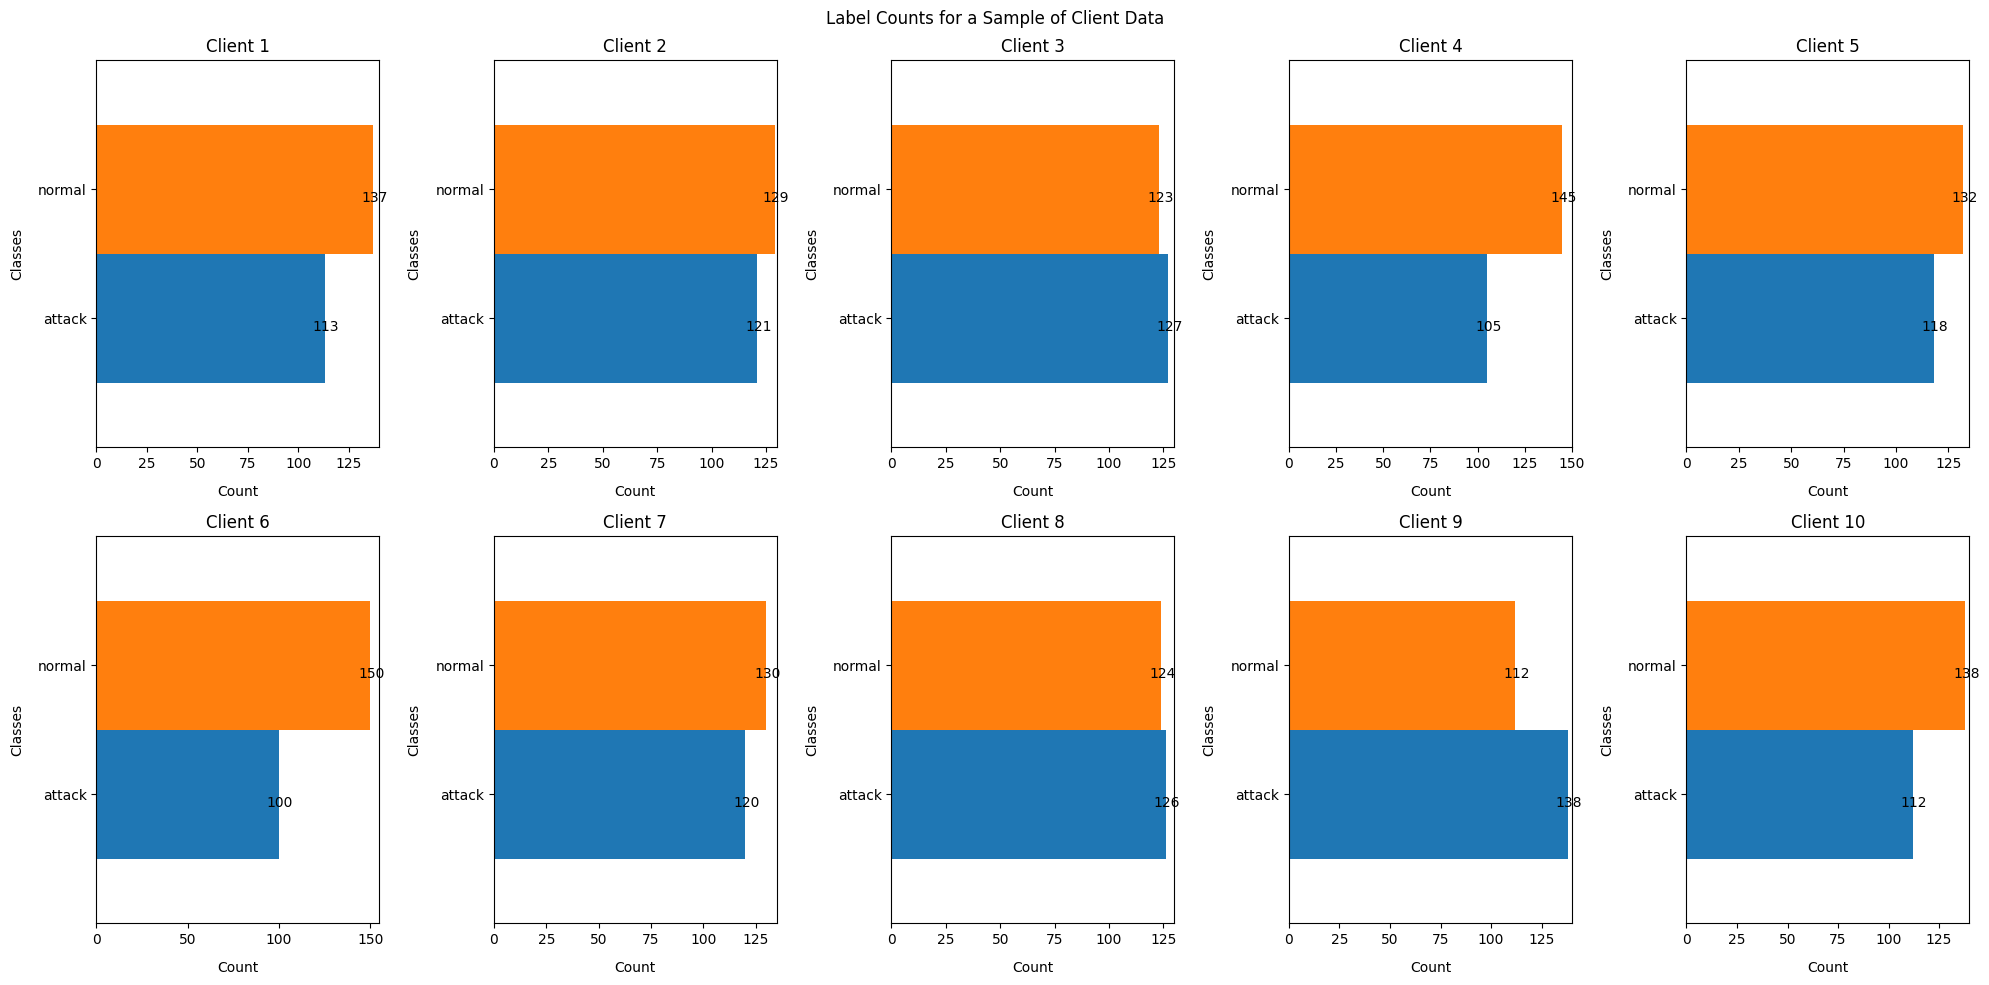

In [ ]:
import matplotlib.pyplot as plt
import collections

fig = plt.figure(figsize=(20, 10))  # Increase the height to accommodate larger subplots
fig.suptitle('Label Counts for a Sample of Client Data')

# Calculate the number of rows and columns for subplots
# n_workers = 10  # Assuming you have 10 workers
n_cols = min(n_workers, 5)
n_rows = (n_workers + n_cols - 1) // n_cols

for i in range(n_workers):
    m = 0
    plot_data = collections.defaultdict(list)
    for label in list(client_data[i])[0]['y'].numpy()[:,0]:
        plot_data[label].append(label)
        m = max(m, len(plot_data[label]))

    xlim = [0, m+(5-m%5)]
    ylim = [min(unique_codes)-1, max(unique_codes)+1]
    yticks = list(range(min(unique_codes), max(unique_codes)+1))
    yticks_labels = [mapping[k] for k in range(0, max(unique_codes)+1)]

    # Calculate the position of the subplot
    row_index = i // n_cols
    col_index = i % n_cols

    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.set_title('Client {}'.format(i+1))
    ax.set_xlabel('Count', labelpad=10)
    ax.set_xlim(xlim)
    ax.set_ylabel('Classes', labelpad=10)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks_labels)

    for key in plot_data:
        if len(plot_data[key]) > 0:
            ax.text(len(plot_data[key])+0.6, int(key)-0.1, str(len(plot_data[key])), ha='center')

    for j in range(min(unique_codes), max(unique_codes)+1):
        ax.hist(
            plot_data[j],
            density=False,
            bins=[k-0.5 for k in range(min(unique_codes), max(unique_codes)+2)],
            orientation='horizontal'
        )

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D,Dense,GroupNormalization
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

In [ ]:
def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Reshape((1, -1)),  # Reshape input to have shape (batch_size, 1, input_dim)
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    return tff.learning.models.from_keras_model(
        model,
        input_spec=collections.OrderedDict(
            x=tf.TensorSpec(shape=[None, input_shape], dtype=tf.float64),
            y=tf.TensorSpec(shape=[None, 1], dtype=tf.int64)),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[BinaryAccuracy(), Precision(), Recall()])

In [ ]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

In [ ]:
print(trainer.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[41,128],
      float32[32,128],
      float32[128],
      float32[41,128],
      float32[32,128],
      float32[128],
      float32[64,64],
      float32[64],
      float32[64,32],
      float32[32],
      float32[32,1],
      float32[1]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[41,128],
    float32[32,128],
    float32[128],
    float32[41,128],
    float32[32,128],
    float32[128],
    float32[64,64],
    float32[64],
    float32[64,32],
    float32[32],
    float32[32,1],
    float32[1]
  >
>@SERVER)


In [ ]:
def evaluate(num_rounds):
    state = trainer.initialize()
    for round in range(num_rounds):
        t1 = time.time()
        result = trainer.next(state, client_data)
        state = result.state
        train_metrics = result.metrics['client_work']['train']
        # print(train_metrics)


        train_accuracy = train_metrics['binary_accuracy'] * 100
        train_precision = train_metrics['precision'] * 100
        train_recall = train_metrics['recall']*100


        t2 = time.time()
        print('Round {}: accuracy {}, Precision {}, Recall {},round time {}'.format(
            round+1, train_accuracy, train_precision,train_recall, t2 - t1))

In [ ]:
evaluate(20)

Round 1: accuracy 94.00428533554077, Precision 91.63610339164734, Recall 97.67882823944092,round time 41.52317833900452
Round 2: accuracy 95.25918960571289, Precision 93.68891716003418, Recall 97.69623279571533,round time 28.42377805709839
Round 3: accuracy 95.55052518844604, Precision 94.40752267837524, Recall 97.43290543556213,round time 30.132317781448364
Round 4: accuracy 95.97340822219849, Precision 94.71393823623657, Recall 97.9186475276947,round time 32.48103141784668
Round 5: accuracy 96.21290564537048, Precision 94.57685351371765, Recall 98.55376482009888,round time 29.13372564315796
Round 6: accuracy 96.37151956558228, Precision 94.7721540927887, Recall 98.64109754562378,round time 26.323428869247437
Round 7: accuracy 96.52742743492126, Precision 94.70904469490051, Recall 99.02403950691223,round time 32.732104778289795
Round 8: accuracy 96.66610956192017, Precision 94.73727345466614, Recall 99.26624894142151,round time 32.87866711616516
Round 9: accuracy 96.64689898490906, Pr

In [ ]:
def evaluate_test(num_rounds):
    state = trainer.initialize()
    for round in range(num_rounds):
        t1 = time.time()
        result = trainer.next(state, client_data_test)
        state = result.state
        # print(result.metrics)
        test_metrics = result.metrics['client_work']['train']
        # print(train_metrics)


        test_accuracy = test_metrics['binary_accuracy'] * 100
        test_precision = test_metrics['precision'] * 100
        test_recall = test_metrics['recall']*100


        t2 = time.time()
        print('Round {} : accuracy {}, Precision {}, Recall {}, round time {}'.format(
            round+1, test_accuracy, test_precision,test_recall, t2 - t1))

In [ ]:
evaluate_test(100)

Round 1 : accuracy 81.03061318397522, Precision 78.05476784706116, Recall 77.44868397712708, round time 5.956145286560059
Round 2 : accuracy 87.20585703849792, Precision 84.14907455444336, Recall 86.37362718582153, round time 7.302403926849365
Round 3 : accuracy 90.12466669082642, Precision 91.03628993034363, Recall 85.32552123069763, round time 6.862739562988281
Round 4 : accuracy 91.11091494560242, Precision 95.5436110496521, Recall 83.10491442680359, round time 5.997892141342163
Round 5 : accuracy 90.3952956199646, Precision 96.17906212806702, Recall 80.76508641242981, round time 8.292763948440552
Round 6 : accuracy 86.20186448097229, Precision 95.72798013687134, Recall 70.92266082763672, round time 6.1661553382873535
Round 7 : accuracy 91.65971875190735, Precision 97.37218022346497, Recall 82.74414539337158, round time 8.866427183151245
Round 8 : accuracy 91.91925525665283, Precision 97.01266288757324, Recall 83.69479775428772, round time 5.834837436676025
Round 9 : accuracy 91.492